
# Business Cases with Data Science 

## Case 1: Customer Segmentation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Ana Claudia Alferes (M20190932)
2. Pedro Santos (M20190420)
3. Michael Machatschek (M20190054)
4. Lennart Dangers (M20190251)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

# Step 1: Business Understanding

# Step 2: Data Understanding

## Dataset Description

 Description of each variable 
 
 - var 1 ...
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
path = "https://raw.githubusercontent.com/lennartda/business_cases_C1/master/Data/Dataset.csv"
df = pd.read_csv(path, sep=";")

In [37]:
#Set ID as an Index: Check if ID only contains unique values
#df.shape: (111733, 29)
#df["ID"].nunique(): 111733
df = df.set_index('ID')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMediumFloor           111733 non-null int64
SRBa

In [6]:
summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,111733,NaN,NaN,NaN,55867,32254.7,1,27934,55867,83800,111733
Nationality,111733,199,FRA,16516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107561,NaN,NaN,NaN,45.6392,17.245,-10,33,47,58,123
DaysSinceCreation,111733,NaN,NaN,NaN,595.027,374.657,36,288,522,889,1385
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,111733,NaN,NaN,NaN,60.8331,85.1153,-1,0,21,95,588
LodgingRevenue,111733,NaN,NaN,NaN,283.851,379.132,0,0,208,393.3,21781
OtherRevenue,111733,NaN,NaN,NaN,64.6828,123.581,0,0,31,84,8859.25
BookingsCanceled,111733,NaN,NaN,NaN,0.00228223,0.0806315,0,0,0,0,15


In [7]:
df.isnull().sum()

ID                         0
Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [58]:
# Check counts of categorical variables (excluding nationality)
cols = ['MarketSegment']
df[cols].apply(pd.Series.value_counts)

,MarketSegment
Other,63680
Direct,16363
Travel Agent/Operator,16353
Groups,11461
Corporate,2931
Complementary,657
Aviation,288


In [59]:
cols = ['DistributionChannel']
df[cols].apply(pd.Series.value_counts)

,DistributionChannel
Travel Agent/Operator,91019
Direct,16883
Corporate,3135
GDS Systems,696


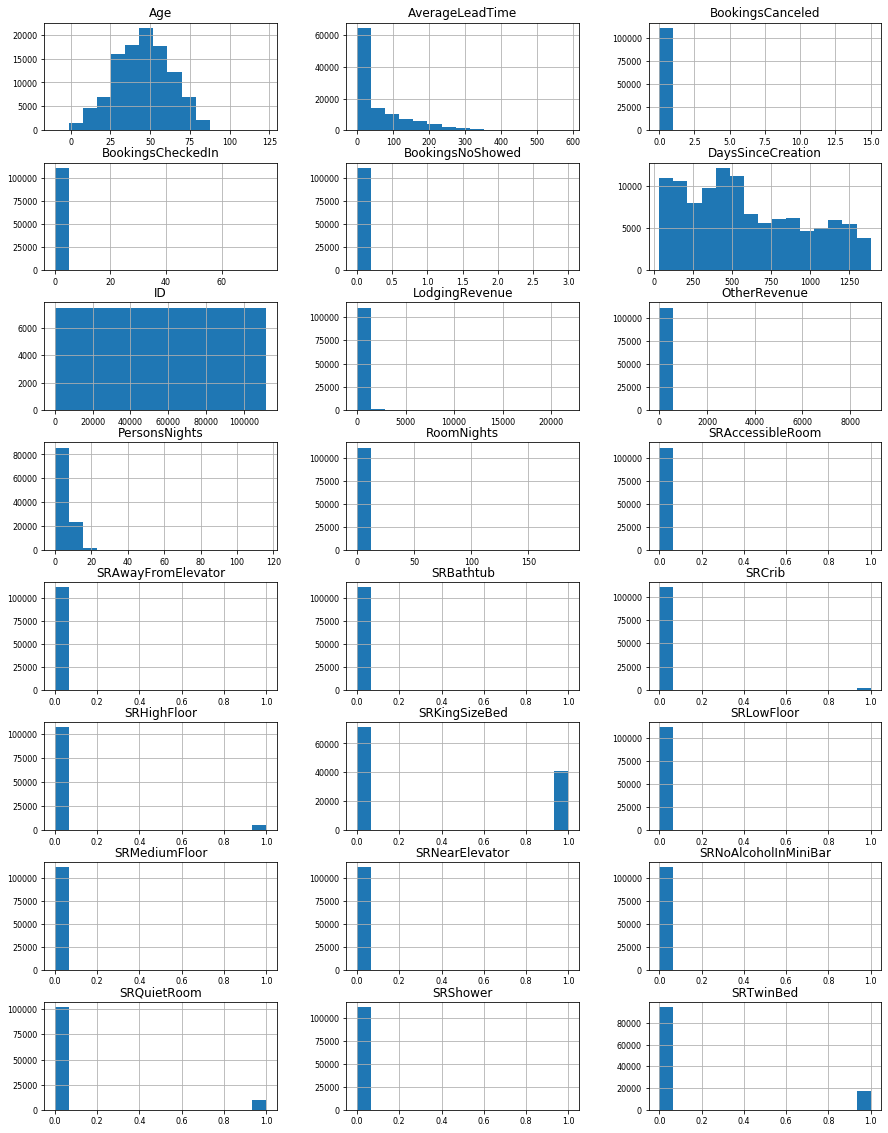

In [9]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

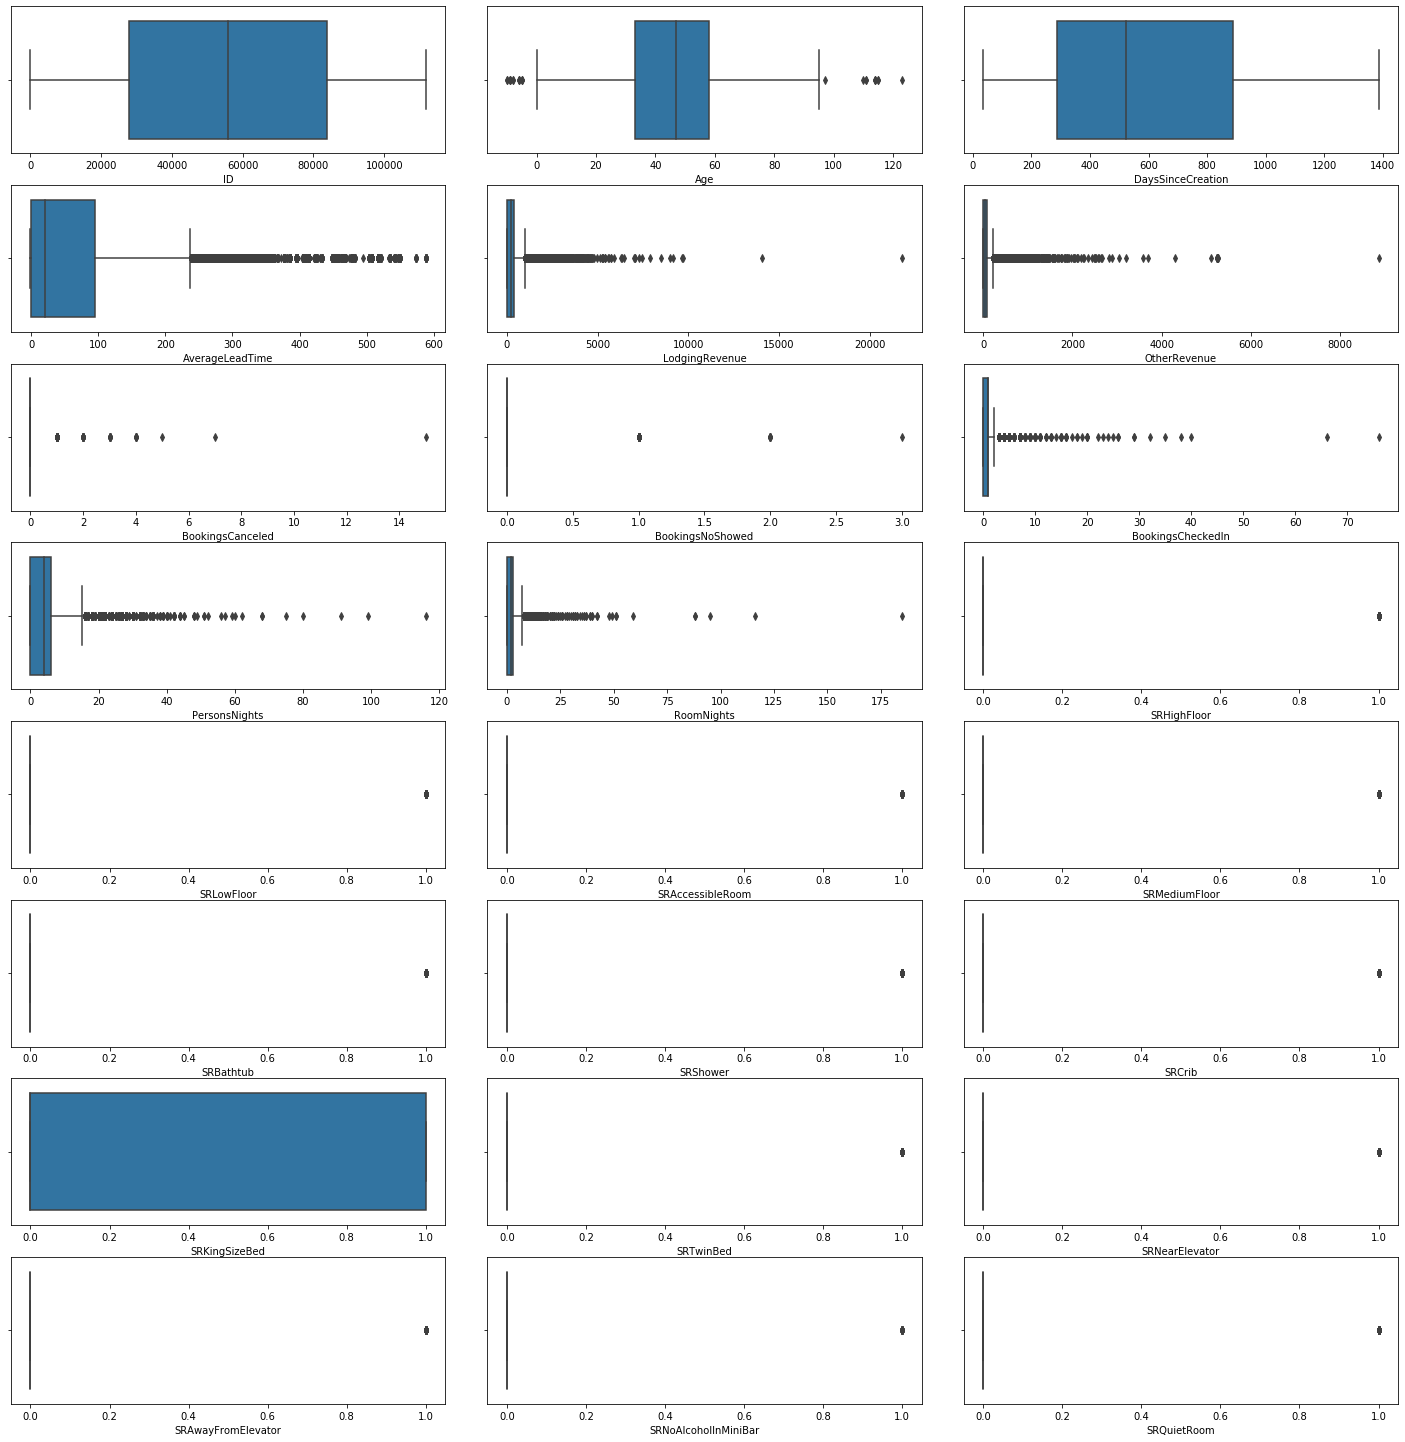

In [10]:
#boxplots to detect outliers
fig, ax = plt.subplots(8, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

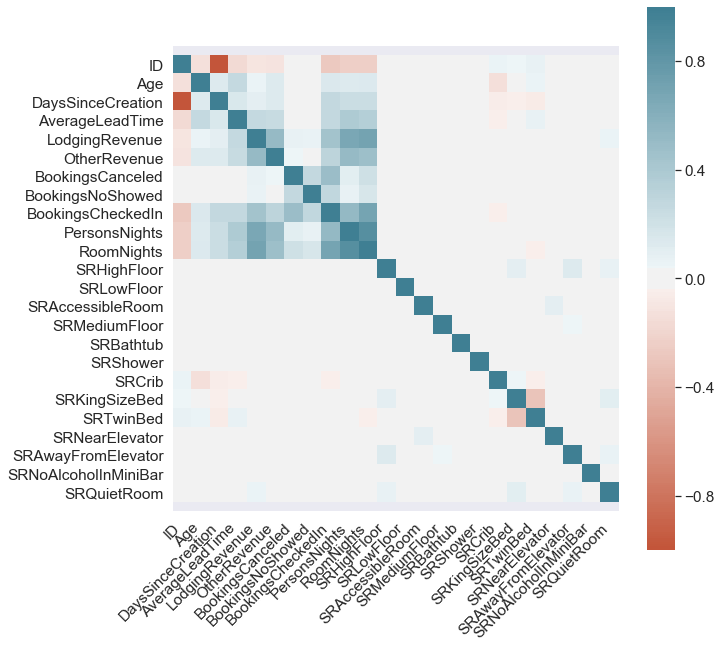

In [11]:
corr = df[numerical].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
# Doc ID NaNs 
df[(df.BookingsCheckedIn != 0) & (df.DocIDHash !=df.DocIDHash)].T #Attended bookings

df[(df.BookingsCheckedIn == 0) & (df.DocIDHash !=df.DocIDHash)].T #Never been and no doc

df[(df.BookingsCheckedIn == 0) & (df.BookingsCanceled == 0)& (df.BookingsNoShowed == 0)] #Never been

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
10,11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
12,13,FRA,57.0,1385,0x4DCD77E3D2E2CC9E22007657A9FD76DC517A32B6AFED...,0x670102CA121D0317A5AA2047ED6D63535A1E7177DEC5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
14,15,ESP,58.0,1385,0x687F687634AB73BF29FF942F4E32781663FE00ACAD25...,0x24BE7F0DC5BB617D19234A7C338B9723F55833265C31...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
17,18,FRA,72.0,1385,0xA72500CAF0F282A35AA333F7F3D09CE0157F6AEAB525...,0x0FA6748AEF42771528A93C08BE13EF84F704E7C8F5D1...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
19,20,FRA,27.0,1385,0x60D60695D7E3650D5C35B0DF105F85134450F8456C4D...,0x465FA5F32DE6BF5C84493F791F3DC03DBB7CCA541FB1...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
22,23,NLD,53.0,1385,0x1BF98EF4538DCA9239D75C087B7771C84908600A05E3...,0xB28743B4AFC29A237274E23EB3DCB2110DC506681B48...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 3: Data Preparation

In [40]:
X = df.copy(deep= True)

In [41]:
for v in X.columns.values: 
    print(v)

Nationality
Age
DaysSinceCreation
NameHash
DocIDHash
AverageLeadTime
LodgingRevenue
OtherRevenue
BookingsCanceled
BookingsNoShowed
BookingsCheckedIn
PersonsNights
RoomNights
DistributionChannel
MarketSegment
SRHighFloor
SRLowFloor
SRAccessibleRoom
SRMediumFloor
SRBathtub
SRShower
SRCrib
SRKingSizeBed
SRTwinBed
SRNearElevator
SRAwayFromElevator
SRNoAlcoholInMiniBar
SRQuietRoom


In [49]:
#Merge duplicates
X[(X.DocIDHash.duplicated(keep=False))&(X.DocIDHash == X.DocIDHash)]
def modef(x):
    return x.mode()[0]

aggregation_functions = {'Nationality': modef, 'Age': 'mean', 'DaysSinceCreation': 'first','NameHash': 'first','AverageLeadTime': 'mean'
                        ,'LodgingRevenue': 'sum','OtherRevenue': 'sum','BookingsCanceled': 'sum','BookingsNoShowed': 'sum','BookingsCheckedIn': 'sum','PersonsNights': 'sum','RoomNights': 'sum'
                        ,'DistributionChannel': modef,'MarketSegment': modef,'SRHighFloor': modef,'SRLowFloor': modef,'SRAccessibleRoom': modef,'SRMediumFloor': modef,
                        'SRBathtub': modef,'SRShower': modef,'SRCrib': modef,'SRKingSizeBed': modef,
                        'SRTwinBed': modef,'SRNearElevator': modef,'SRAwayFromElevator': modef,'SRNoAlcoholInMiniBar': modef,
                        'SRQuietRoom': modef}
X_new = X.groupby(X['DocIDHash']).aggregate(aggregation_functions)
X_new = X_new.reset_index()

In [54]:
# Remove columns that should not be used as they do not represent customer's characteristics or behavior
cols = ['index', 'NameHash']
X_new.drop(columns=cols, inplace=True)

KeyError: "['index' 'NameHash'] not found in axis"

In [55]:
X_new

,DocIDHash,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,FRA,60.0,480,64.0,495.00,162.00,0,0,2,...,0,0,0,0,1,0,0,0,0,1
1,0x0000E25BC06E730F6DDD6BD53CBFE05BABD2B0182019...,DEU,54.0,1197,14.0,695.00,100.00,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0x0001425DE03D204F30757BA2E50DBD0486ED254E1E6F...,USA,34.0,120,0.0,0.00,0.00,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0x0002AE77553DBEBD734F0C644E6BE142EA0B4C5D5D83...,IND,5.0,569,0.0,0.00,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0x0002DDD31332B77DA9499876CD3577B08844812E95F2...,ESP,53.0,755,56.0,165.00,12.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0x0002DE82570CC9C1FCB011BB15EA98B1004D32F55DCE...,FRA,43.0,547,0.0,0.00,0.00,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0x0002ED07243C5575B6A6FBD42EF80DE8006E0CFDC21C...,FRA,33.0,673,2.0,237.00,71.60,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0x000394A95AC0BF307557B6BEFBE3F9442BD500BA48B4...,DEU,31.0,94,179.0,168.00,66.00,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,0x000443891856CB5D74287EDBFBE82A4F6D2841F2D1DB...,IND,38.0,630,40.0,747.00,195.47,0,0,2,...,0,0,0,0,0,1,0,0,0,0
9,0x0004C8DCE2B4B50CB6872BFE50E79528C3BA71DA0A3B...,GBR,47.0,162,0.0,0.00,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Outlier handling 
X_new

In [35]:
#Verification of the highest occurrence DocIDHash
a = X[X.DocIDHash == "0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855"]
a.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,3032.000000,171.000000,3032.000000,3032.000000,3032.00000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,...,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000,3032.0,3032.000000,3032.0,3032.000000
mean,27710.989446,39.923977,939.059367,66.793206,279.39407,74.225241,0.007586,0.002309,1.010884,4.476253,...,0.000660,0.001319,0.000330,0.007916,0.268140,0.133575,0.0,0.002639,0.0,0.028694
std,24608.243062,17.188918,330.527479,86.646586,308.56411,156.057844,0.090502,0.054442,0.527890,3.920620,...,0.025679,0.036304,0.018161,0.088631,0.443064,0.340251,0.0,0.051307,0.0,0.166972
min,2.000000,2.000000,38.000000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,8240.250000,29.000000,690.750000,4.000000,101.56500,14.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,20409.500000,39.000000,1022.000000,30.000000,188.00000,41.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,41602.750000,53.500000,1219.000000,103.250000,358.07500,84.000000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000
max,111553.000000,83.000000,1385.000000,588.000000,4255.00000,5105.500000,2.000000,2.000000,19.000000,51.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


In [48]:
for x in X.columns.values: 
    print(x + str(X[x].mode()[0]))

NationalityFRA
Age51.0
DaysSinceCreation502
NameHash0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51EF134B078B9D61A8CC4A
DocIDHash0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855
AverageLeadTime0
LodgingRevenue0.0
OtherRevenue0.0
BookingsCanceled0
BookingsNoShowed0
BookingsCheckedIn1
PersonsNights0
RoomNights0
DistributionChannelTravel Agent/Operator
MarketSegmentOther
SRHighFloor0
SRLowFloor0
SRAccessibleRoom0
SRMediumFloor0
SRBathtub0
SRShower0
SRCrib0
SRKingSizeBed0
SRTwinBed0
SRNearElevator0
SRAwayFromElevator0
SRNoAlcoholInMiniBar0
SRQuietRoom0
